# Exploratory data analysis (EDA) - Airbnb NYC - Pricing and Revenue

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import numpy as np

## Analysis of pricing and monthly revenue

After cleaning I started analysing the data

Note that I added a variation of graphs, just to test them all and see how they behave

 - Here the idea is just to have an overview of pricing and monthly revenue distributions

In [2]:
listings_nyc_final = pd.read_csv('data/listings_nyc_final.csv')
listings_nyc_final.head()

id  host_id  host_is_superhost neighbourhood  latitude  longitude  \
0  2539     2787                0.0      Brooklyn  40.64749  -73.97237   
1  3647     4632                0.0        Harlem  40.80902  -73.94190   
2  7750    17985                0.0        Harlem  40.79685  -73.94872   
3  8505    25326                1.0      Brooklyn  40.65599  -73.97519   
4  8700    26394                0.0     Manhattan  40.86754  -73.92639   

  property_type        room_type  accommodates  bathrooms  ...  \
0     Apartment     Private room             2        1.0  ...   
1     Apartment     Private room             2        1.0  ...   
2     Apartment  Entire home/apt             4        1.0  ...   
3   Condominium     Private room             2        1.0  ...   
4     Apartment     Private room             2        1.0  ...   

   minimum_nights  availability_30 instant_bookable  \
0               1               30                0   
1               3               30                0   
2               7                4                0   
3               1               25                0   
4               4                0                0   

           cancellation_policy  calculated_host_listings_count  \
0                     moderate                               6   
1  strict_14_with_grace_period                               1   
2                     flexible                               2   
3                     moderate                               2   
4                     moderate                               1   

   external_amenities  building_offers  internal_amenities  extras  \
0                   0                6                   6       2   
1                   0                0                   3       0   
2                   0                2                   3       0   
3                   0                1                   4       1   
4                   0                3                   2       1   

  revenue_month  
0             0  
1             0  
2          4940  
3           300  
4          2400  

[5 rows x 26 columns]

<Axes: xlabel='price', ylabel='Count'>

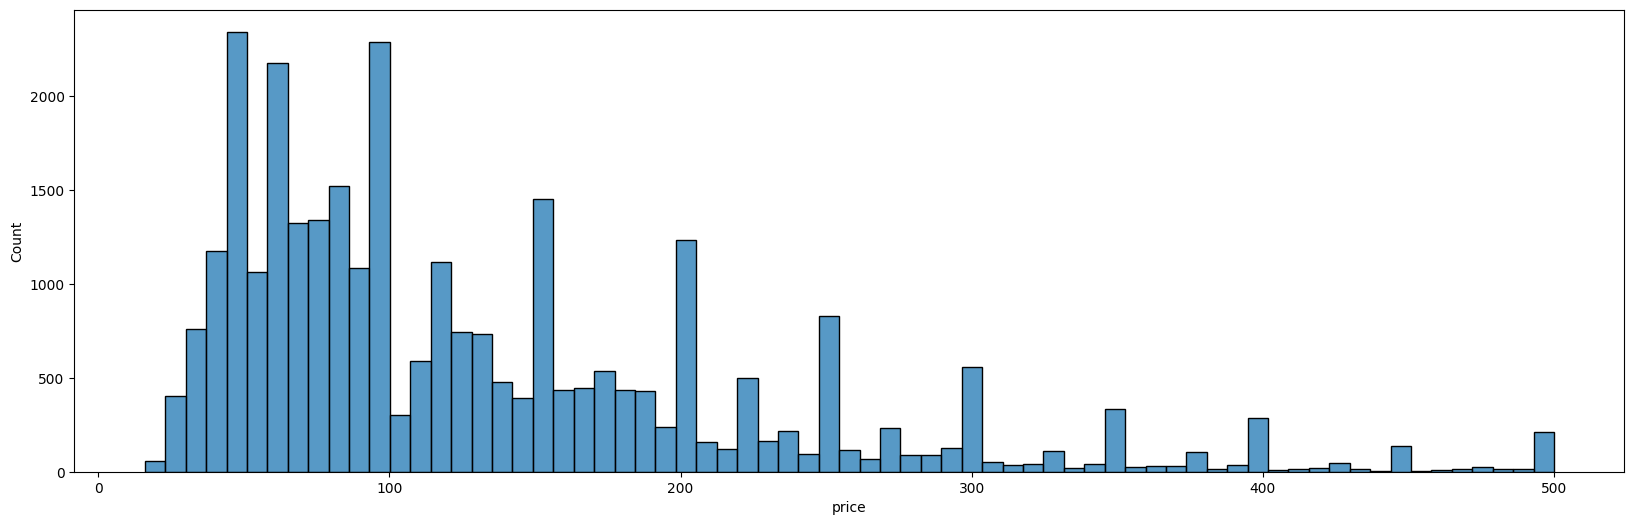

In [3]:
plt.figure(figsize=(20, 6))
sns.histplot(data=listings_nyc_final, x="price")

<Axes: xlabel='revenue_month', ylabel='Count'>

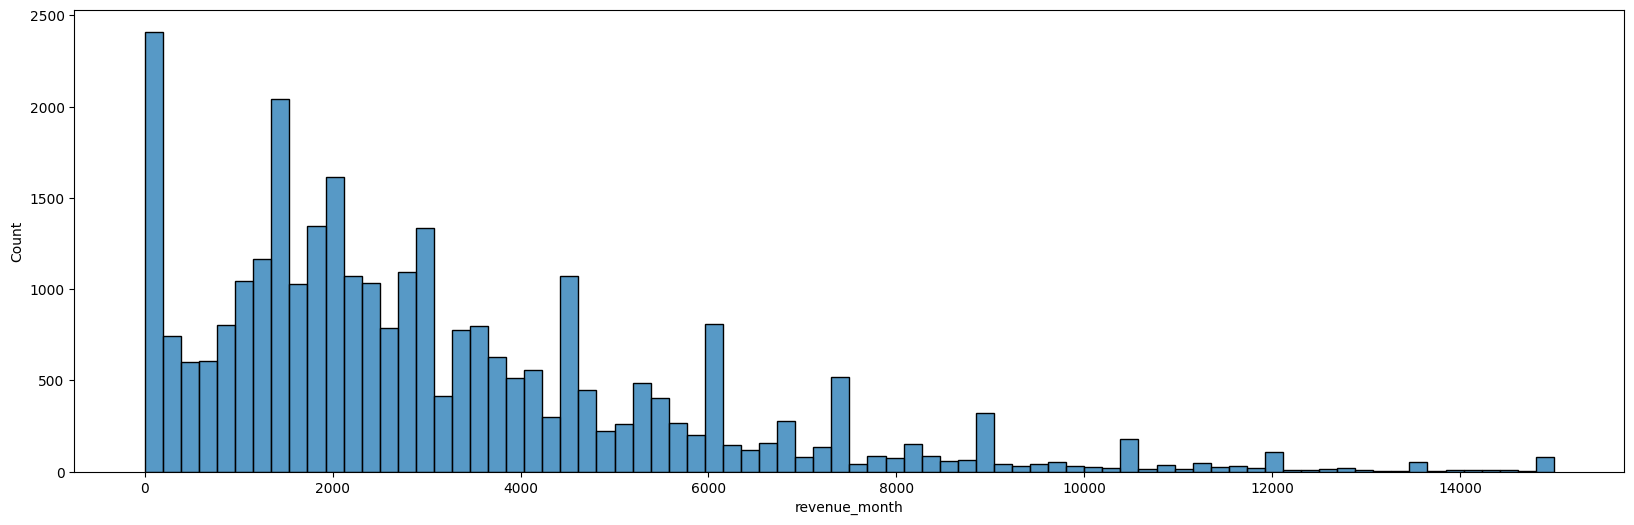

In [4]:
plt.figure(figsize=(20, 6))
sns.histplot(data=listings_nyc_final, x="revenue_month")

In [5]:
def price_group_percentage(val, operator, column):
    if operator == '<':
        res = listings_nyc_final[listings_nyc_final[column]<val].shape[0]
    elif operator == '>':
        res = listings_nyc_final[listings_nyc_final[column]>val].shape[0]
    elif operator == '=':
        res = listings_nyc_final[listings_nyc_final[column]==val].shape[0]
    print(f'{res} listings, {round(res*100/listings_nyc_final.shape[0], 2)}%')
    
    
price_group_percentage(100, '=', 'price')
price_group_percentage(150, '=', 'price')
price_group_percentage(50, '=', 'price')
price_group_percentage(50, '<', 'price')
price_group_percentage(200, '<', 'price')
price_group_percentage(200, '>', 'price')
price_group_percentage(300, '>', 'price')


1339 listings, 4.44%
1292 listings, 4.29%
1122 listings, 3.72%
3545 listings, 11.76%
24078 listings, 79.86%
5107 listings, 16.94%
1715 listings, 5.69%


In [6]:
price_group_percentage(3000, '=', 'revenue_month')
price_group_percentage(4500, '=', 'revenue_month')
price_group_percentage(1500, '=', 'revenue_month')
price_group_percentage(1500, '<', 'revenue_month')
price_group_percentage(6000, '<', 'revenue_month')
price_group_percentage(6000, '>', 'revenue_month')
price_group_percentage(9000, '>', 'revenue_month')

865 listings, 2.87%
837 listings, 2.78%
819 listings, 2.72%
8504 listings, 28.21%
26201 listings, 86.91%
3323 listings, 11.02%
962 listings, 3.19%


 - For the 2 graphs below the idea was to see if there was any correlaction between price and revenue
 
     - the conclusion would be that there is and there isn't: in one hand the max rev is tied to the pricing, on the other hand the booking of the listings is not impacted by pricing

<Axes: xlabel='price', ylabel='revenue_month'>

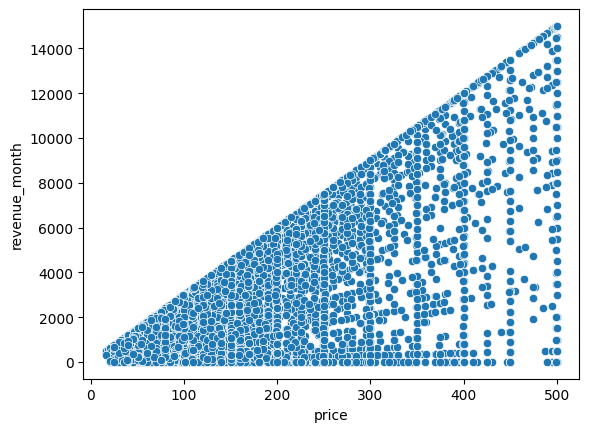

In [7]:
sns.scatterplot(data=listings_nyc_final, x="price", y="revenue_month")

<Axes: xlabel='price', ylabel='availability_30'>

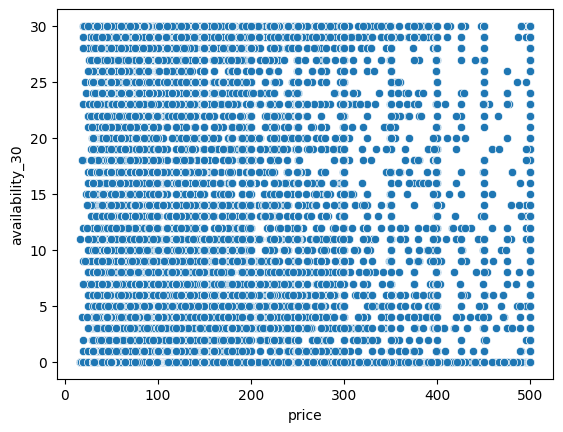

In [8]:
sns.scatterplot(data=listings_nyc_final, x="price", y="availability_30")

 - checking what might affect pricing and revenue:
     - as expected the number of people each listings accomodates and therefore bedrooms, beds, etc, have a moderate positive correlation with pricing and revenue

<Axes: >

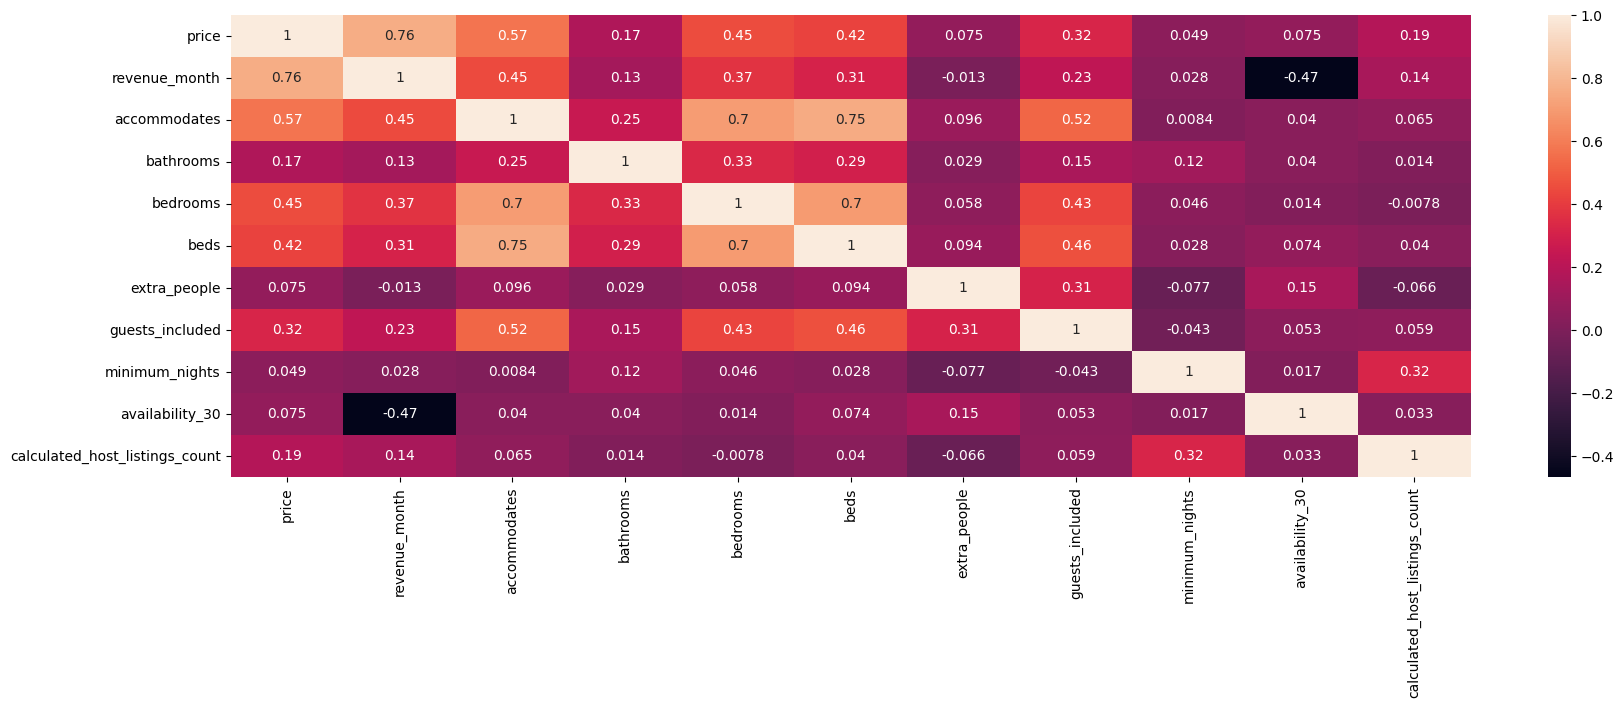

In [9]:
plt.figure(figsize=(20, 6))
subset1 = listings_nyc_final[['price','revenue_month', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'extra_people', 'guests_included', 'minimum_nights',
       'availability_30', 'calculated_host_listings_count']]
sns.heatmap(subset1.corr(), annot=True)

- I'll compare with property type now, but 1st I'm removing the types that have less than 3. Arbitrary decision.

In [10]:
counts = listings_nyc_final['property_type'].value_counts()

property_type_cleaned = listings_nyc_final[~listings_nyc_final['property_type'].isin(counts[counts < 4].index)]

property_type_cleaned.property_type.value_counts()



property_type
Apartment             24517
House                  2122
Condominium             981
Townhouse               770
Loft                    740
Serviced apartment      290
Hotel                   192
Guest suite             137
Boutique hotel          104
Other                    65
Bed and breakfast        63
Hostel                   43
Resort                   25
Guesthouse               24
Bungalow                 19
Aparthotel               11
Villa                     9
Tiny house                7
Cabin                     4
Earth house               4
Name: count, dtype: int64

- Below we can see that the property types do affect pricing and revenue, with resort and apart hotel being the most expensive ones and generating more revenue

<Axes: xlabel='property_type', ylabel='price'>

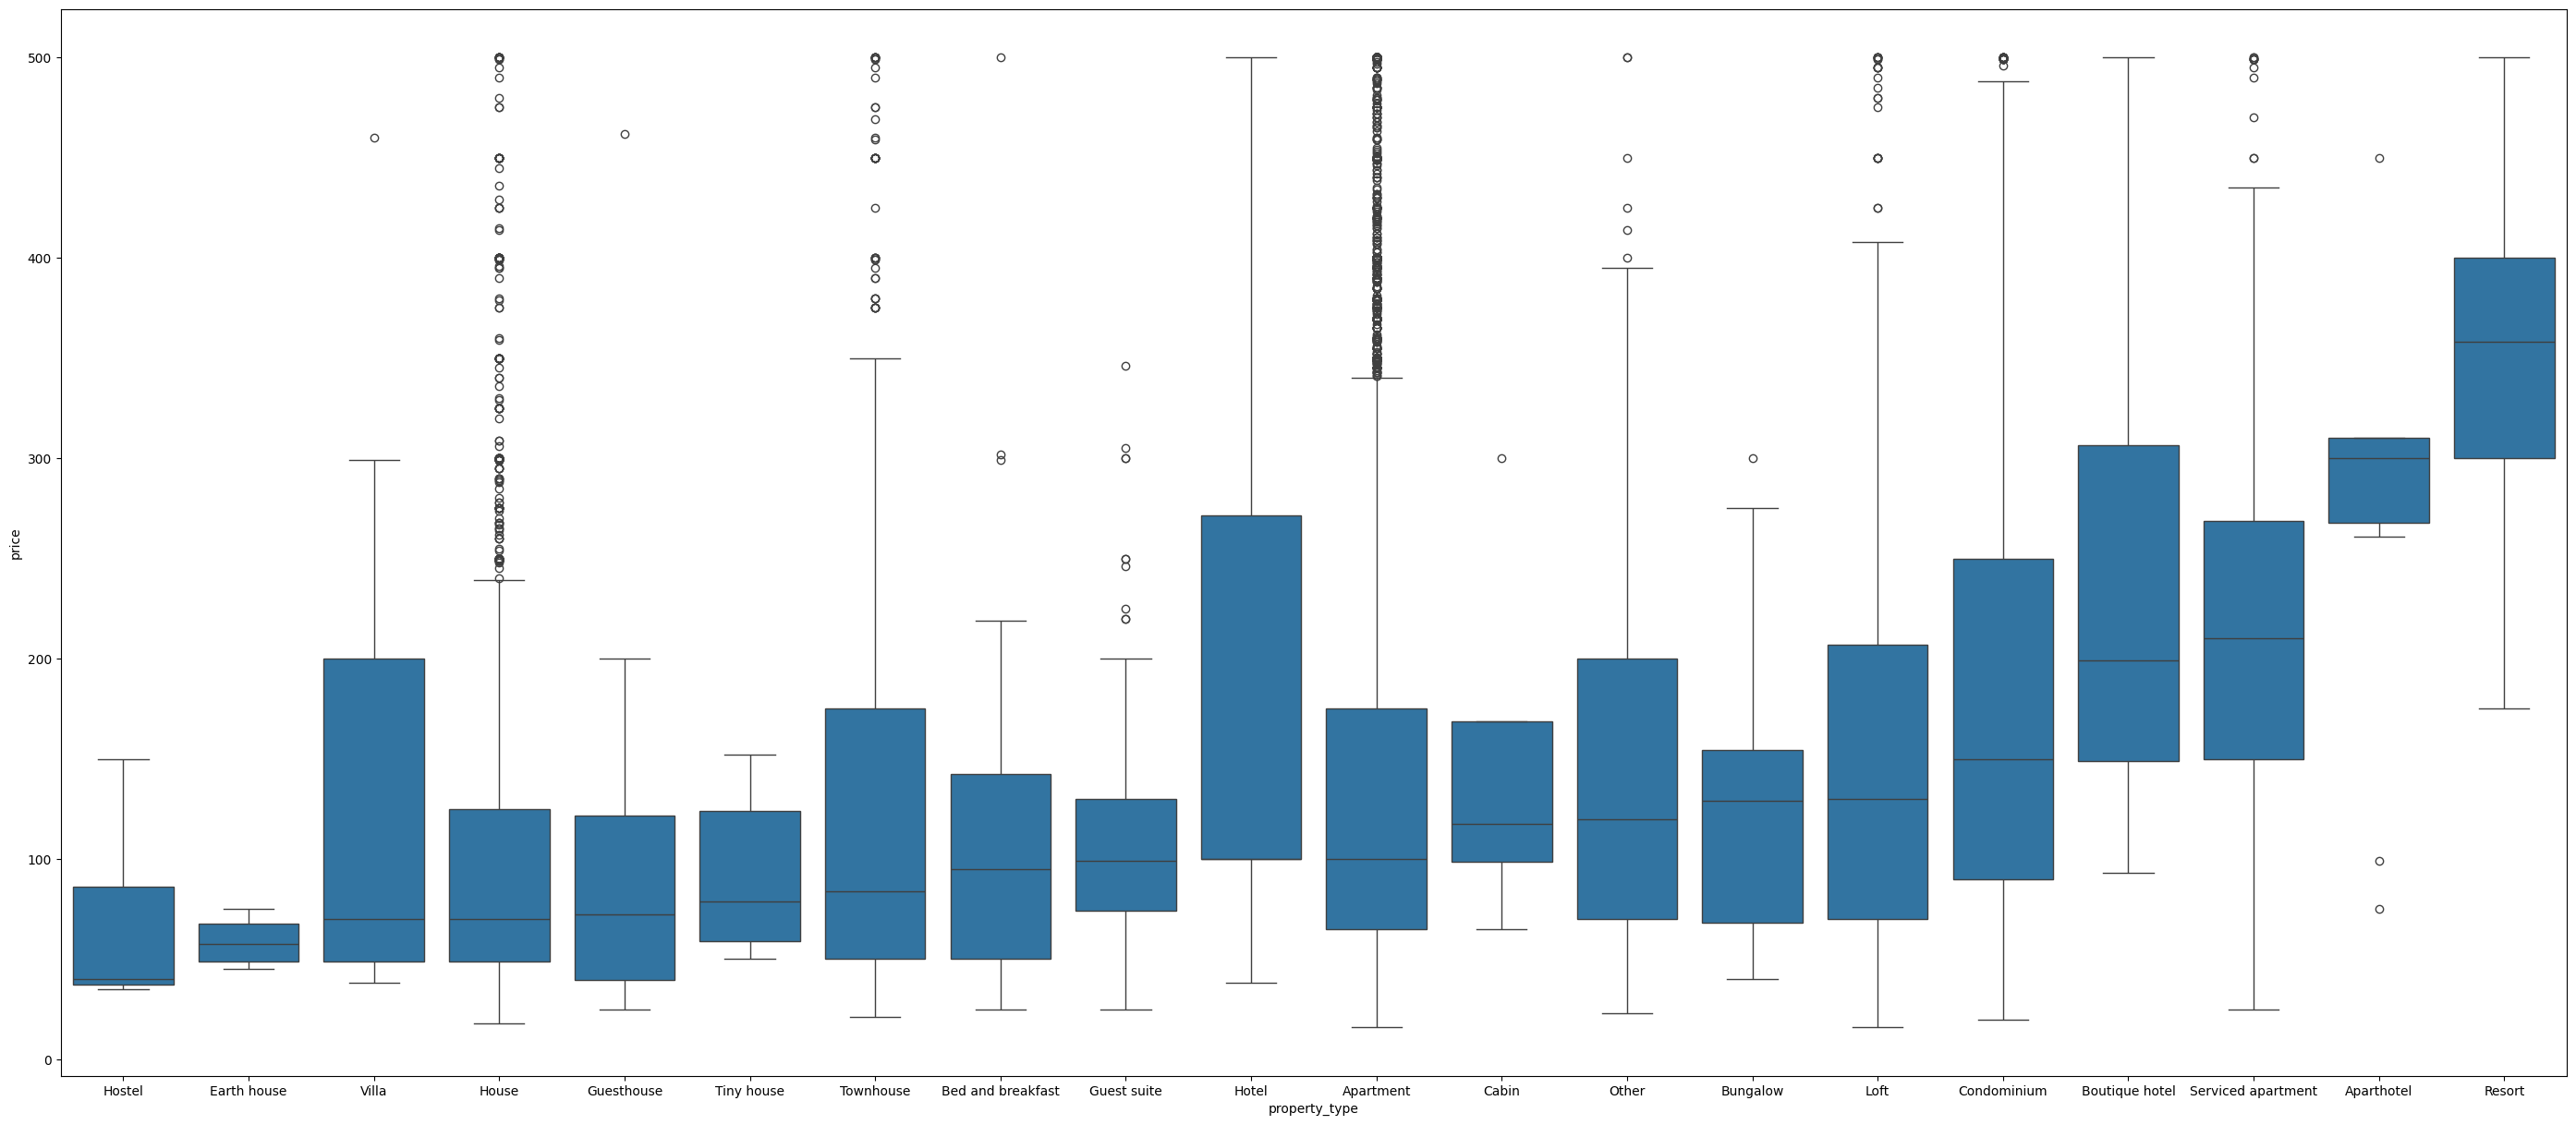

In [11]:
plt.figure(figsize=(35, 15))

sorted_nb = property_type_cleaned.groupby(['property_type'])['price'].median().sort_values()
sns.boxplot(x=property_type_cleaned['property_type'], y=property_type_cleaned['price'], order=list(sorted_nb.index))

<Axes: xlabel='property_type', ylabel='revenue_month'>

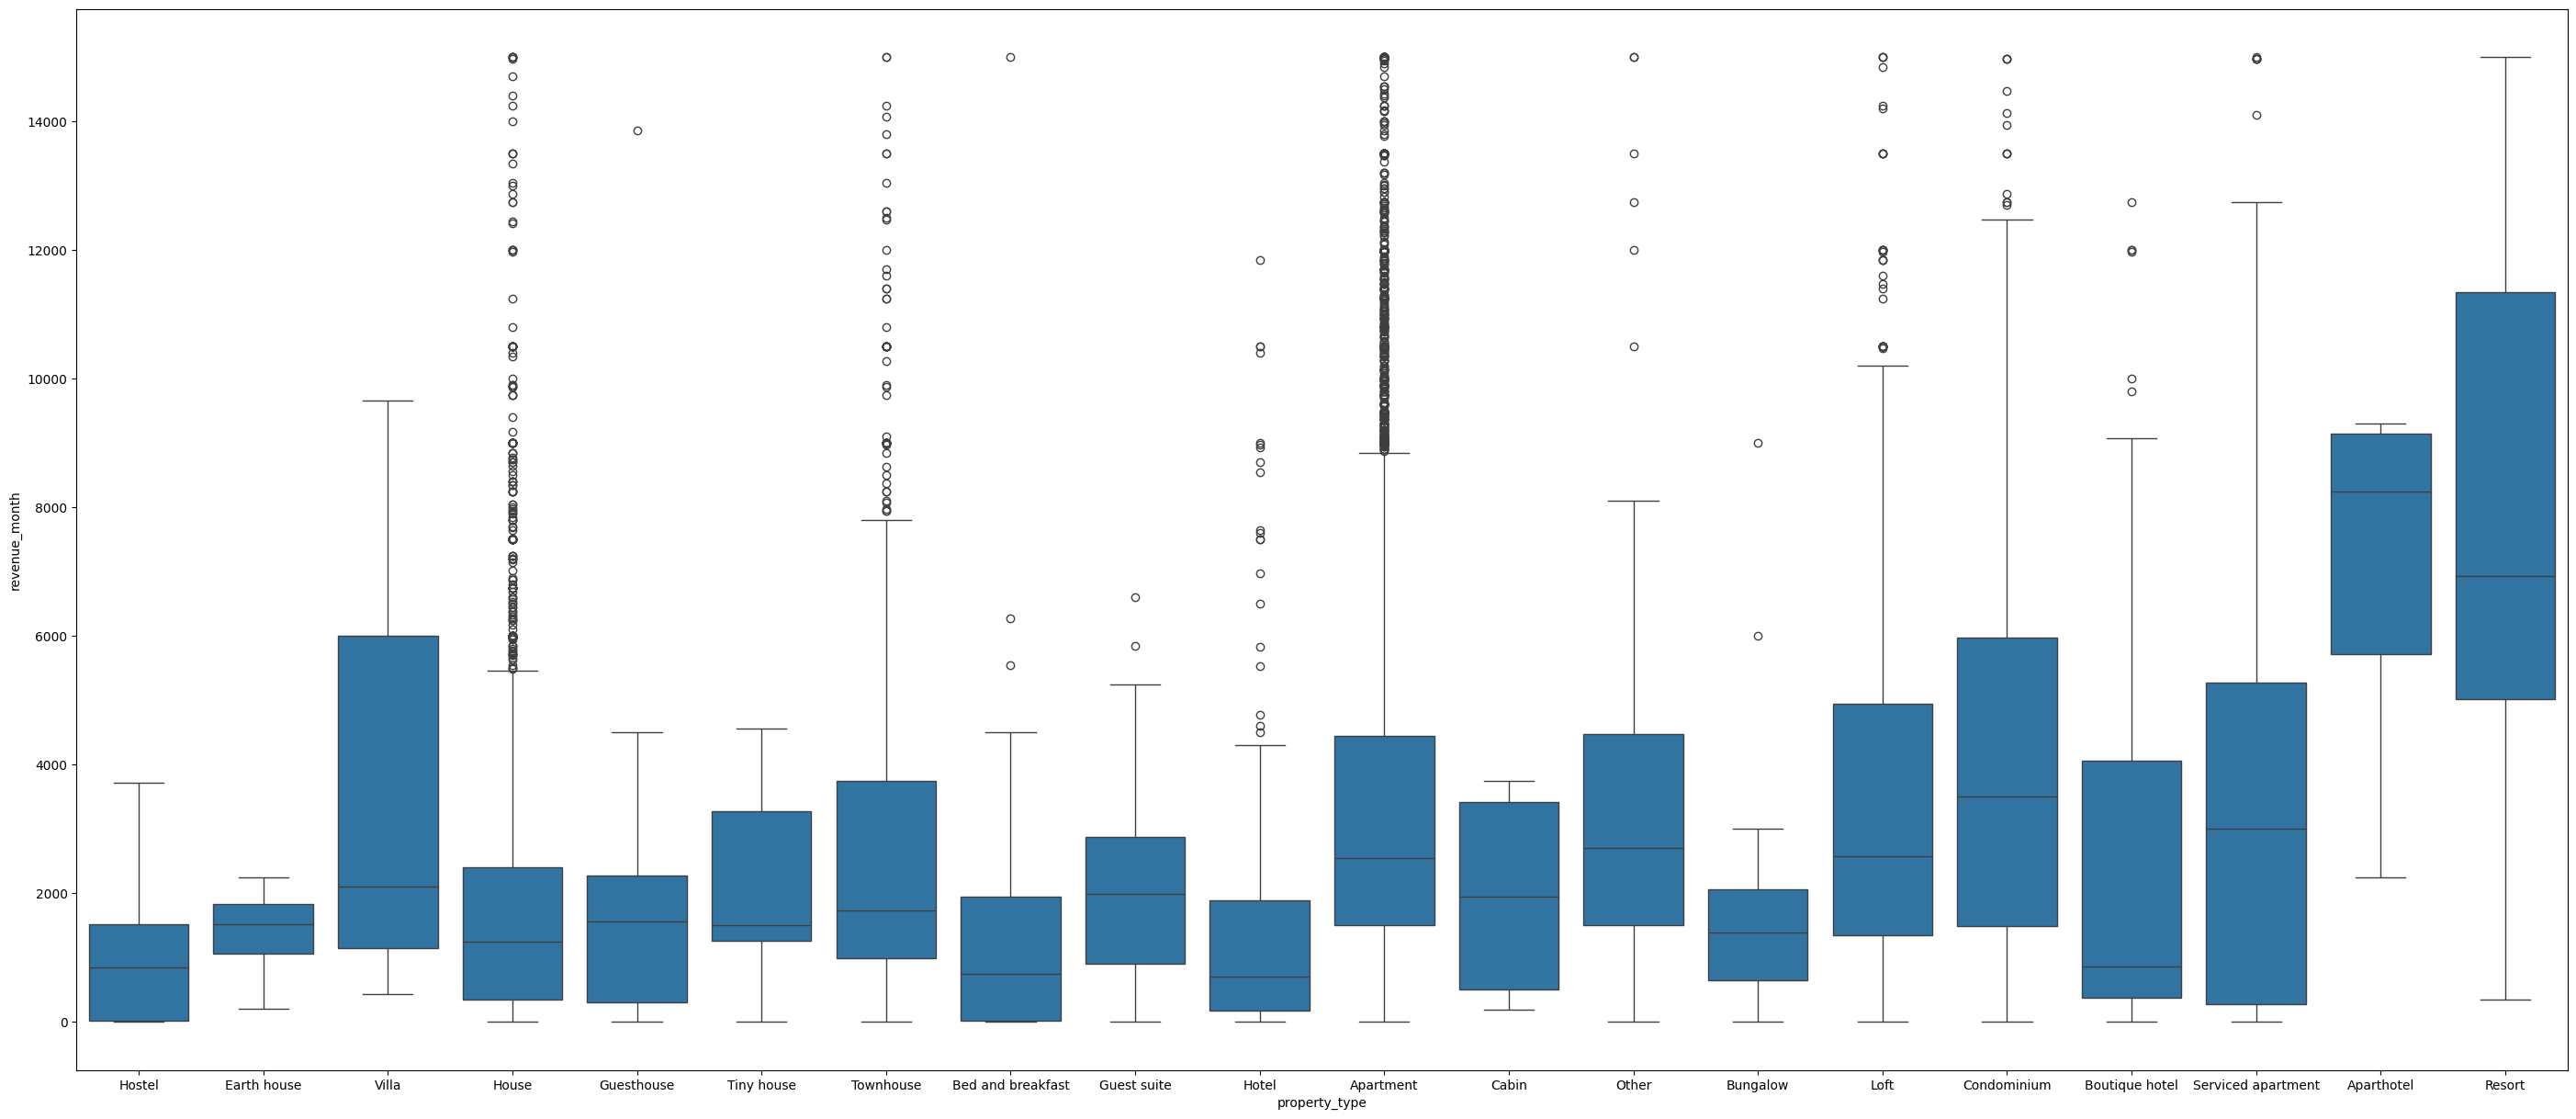

In [12]:
plt.figure(figsize=(35, 15))

sorted_nb2 = property_type_cleaned.groupby(['property_type'])['revenue_month'].median().sort_values()
sns.boxplot(x=property_type_cleaned['property_type'], y=property_type_cleaned['revenue_month'], order=list(sorted_nb.index))

here I just wanted to take a look at the columns again

In [13]:
listings_nyc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30149 entries, 0 to 30148
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30149 non-null  int64  
 1   host_id                         30149 non-null  int64  
 2   host_is_superhost               30149 non-null  float64
 3   neighbourhood                   30140 non-null  object 
 4   latitude                        30149 non-null  float64
 5   longitude                       30149 non-null  float64
 6   property_type                   30149 non-null  object 
 7   room_type                       30149 non-null  object 
 8   accommodates                    30149 non-null  int64  
 9   bathrooms                       30149 non-null  float64
 10  bedrooms                        30149 non-null  int64  
 11  beds                            30149 non-null  int64  
 12  bed_type                        

- Cancellation policy:
    - more expensive listings have more strict cancelation policies, which makes sense

<Axes: xlabel='price', ylabel='cancellation_policy'>

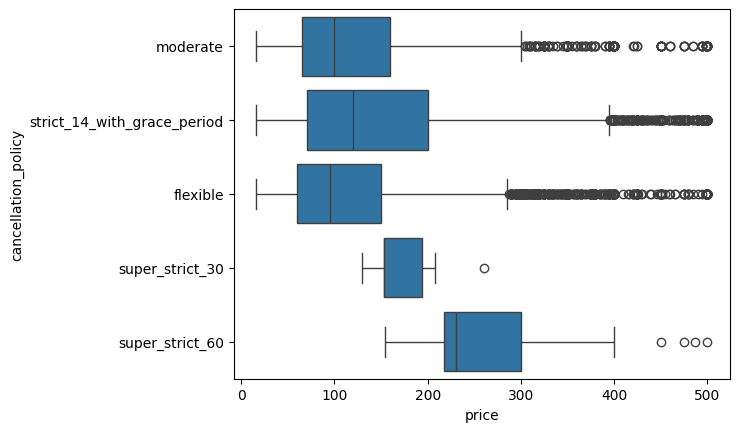

In [14]:
sns.boxplot(
    data=listings_nyc_final,
    x = "price",
    y ="cancellation_policy",
)

<Axes: xlabel='revenue_month', ylabel='cancellation_policy'>

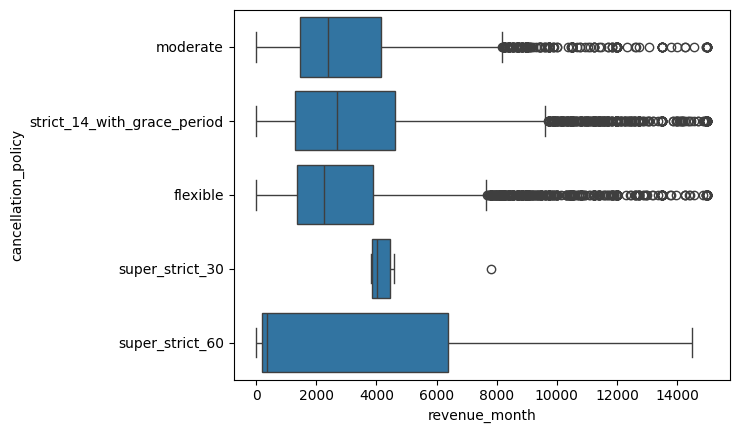

In [15]:
sns.boxplot(
    data=listings_nyc_final,
    x = "revenue_month",
    y ="cancellation_policy",
)

 - below we can see that entire homes are more expensive and generate more revenue, which makes sense

<Axes: xlabel='price', ylabel='Count'>

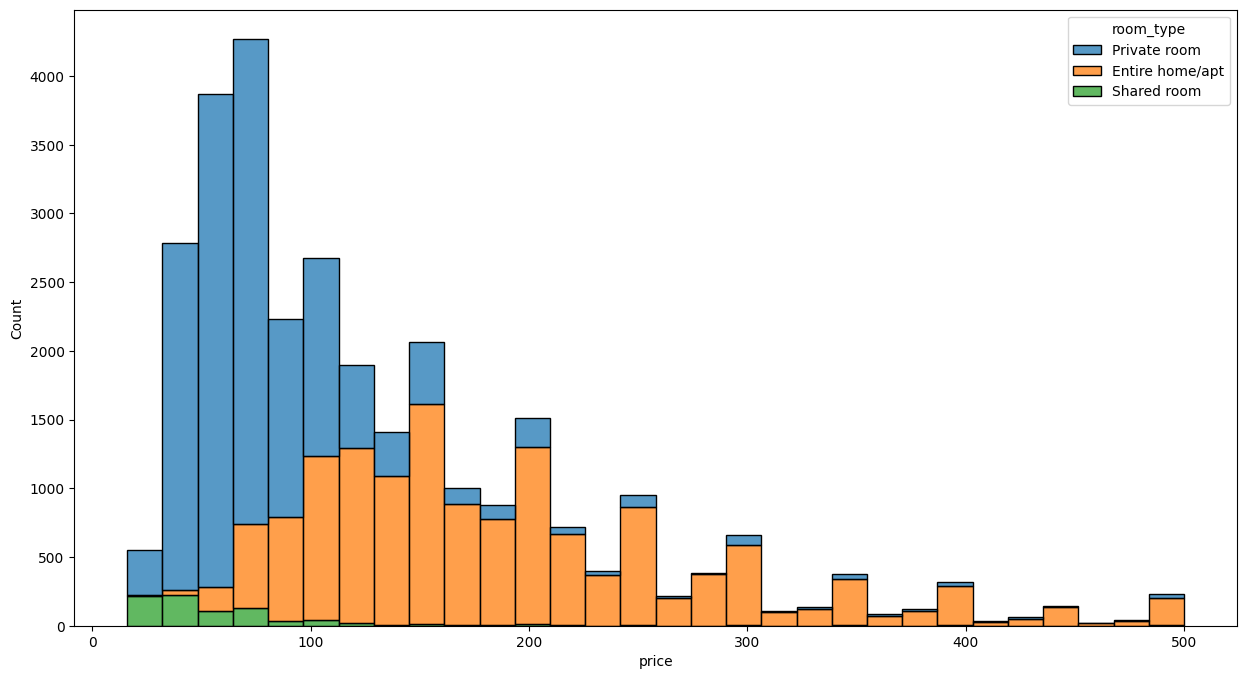

In [16]:
plt.figure(figsize=(15, 8))
sns.histplot(data=listings_nyc_final, x="price", hue="room_type", multiple="stack", bins =30)

<Axes: xlabel='revenue_month', ylabel='Count'>

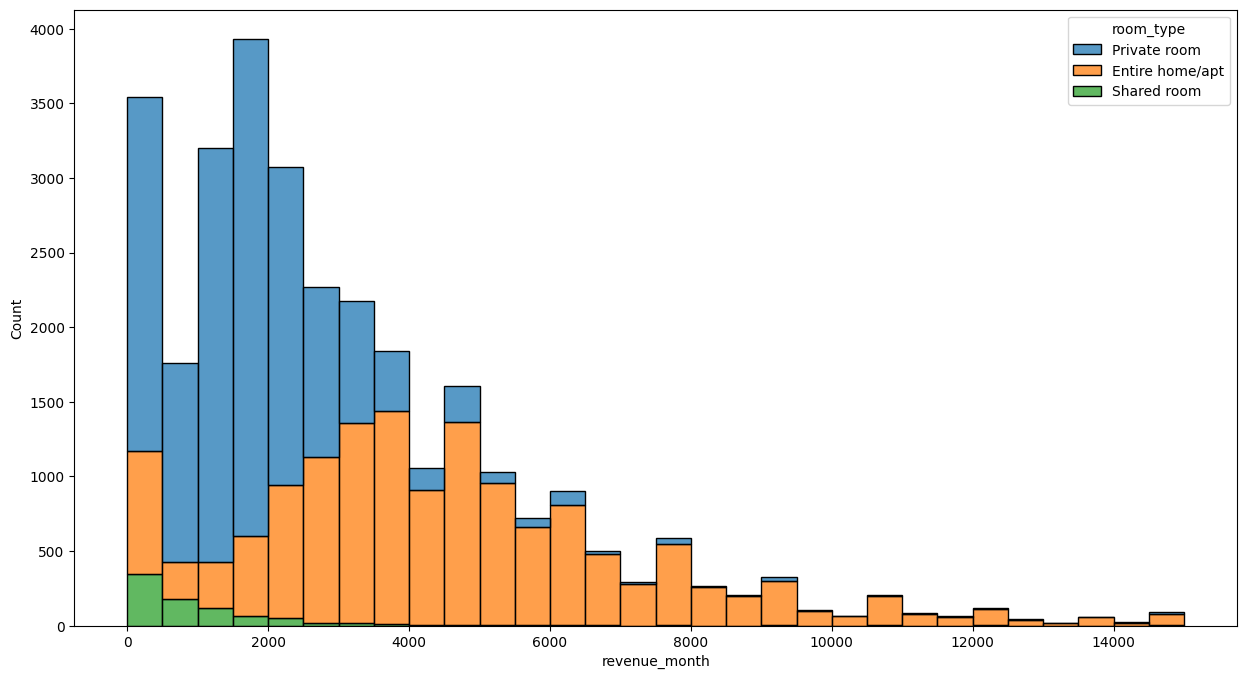

In [17]:
plt.figure(figsize=(15, 8))
sns.histplot(data=listings_nyc_final, x="revenue_month", hue="room_type", multiple="stack", bins =30)

 - below I added the countplot graph just to show that it doesn't make sense to analyse by bed type, as the other types are insignificant

<Axes: xlabel='bed_type', ylabel='count'>

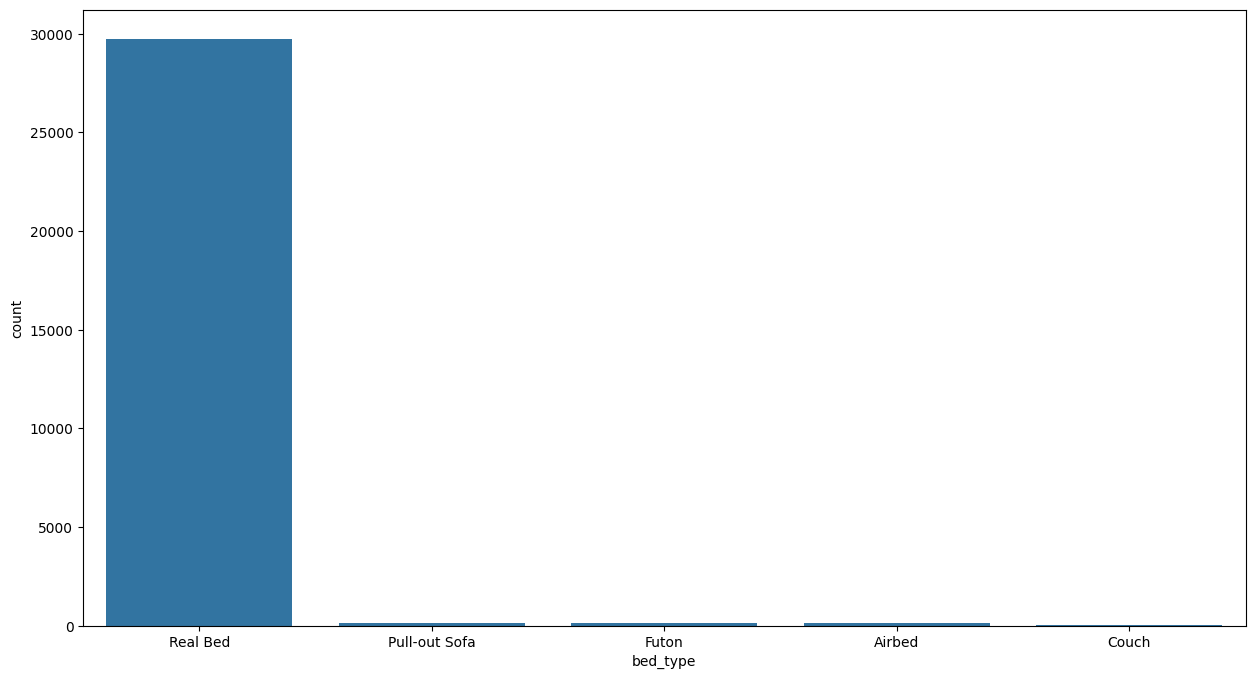

In [18]:
plt.figure(figsize=(15, 8))

sns.countplot(
    data=listings_nyc_final, 
    x="bed_type"
)

 - Here I wanted to test the kdeplot and see if it works well with a continuous variable and a dichotomous variable
     - my interpretation would be that being a super host or not doesn't affect pricing nor montlhy revenue

<Axes: xlabel='price', ylabel='Density'>

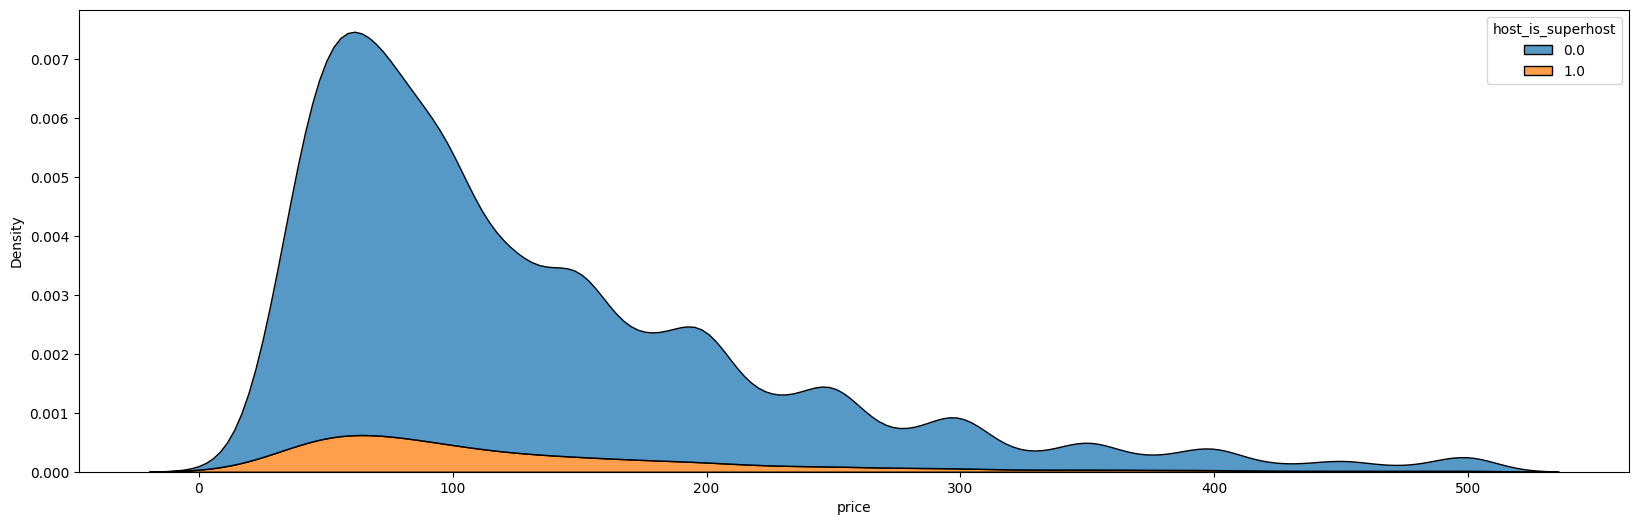

In [19]:
listings_nyc_final['host_is_superhost'] = listings_nyc_final['host_is_superhost'].fillna(0)

plt.figure(figsize=(20, 6))
sns.kdeplot(data=listings_nyc_final, x="price", hue="host_is_superhost", multiple="stack")

<Axes: xlabel='revenue_month', ylabel='Density'>

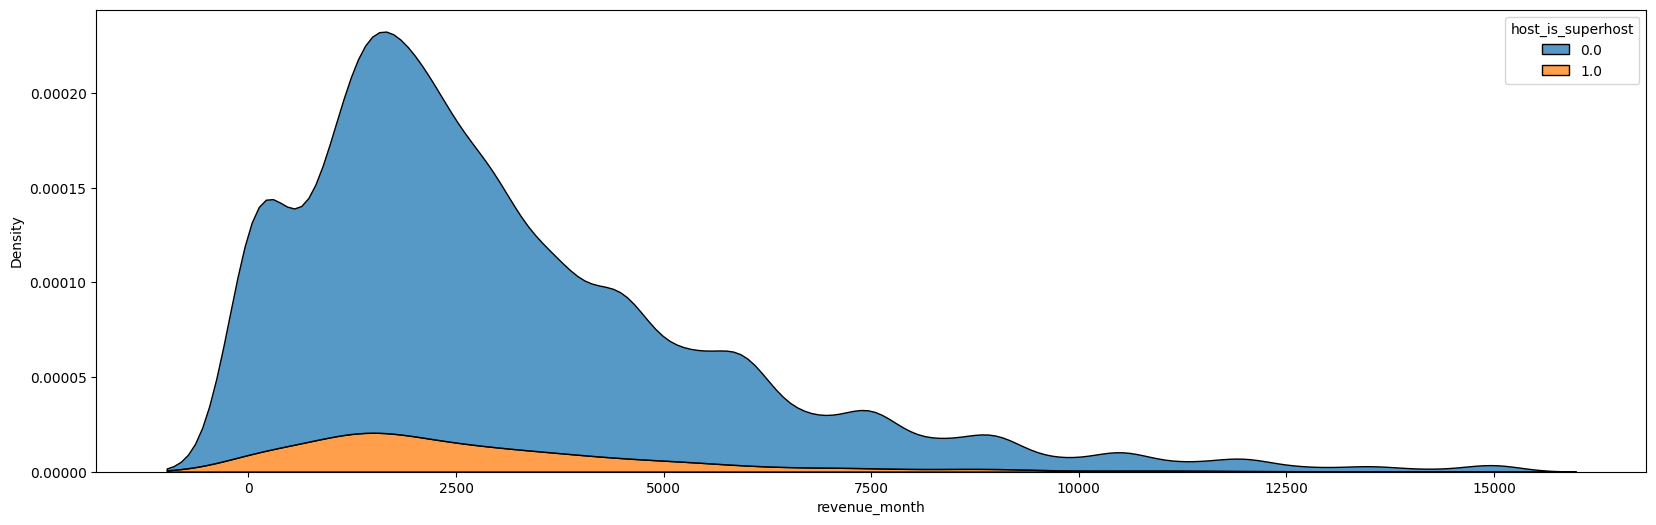

In [20]:
plt.figure(figsize=(20, 6))
sns.kdeplot(data=listings_nyc_final, x="revenue_month", hue="host_is_superhost", multiple="stack")

- Another way to check the relantionship between continuous and dichotomous variable
 - instant booking option doesn't affect pricing/revenue

<Axes: xlabel='instant_bookable', ylabel='price'>

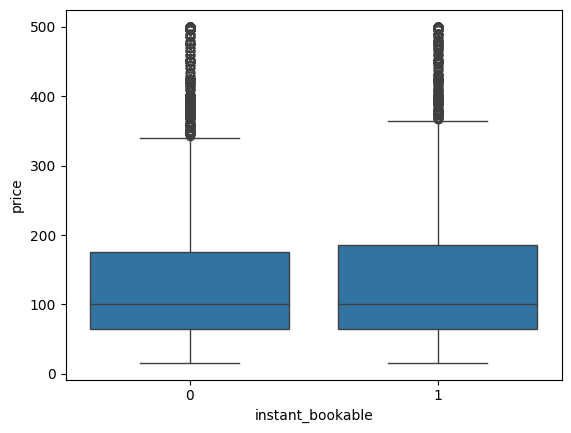

In [21]:
sns.boxplot(data = listings_nyc_final, x = "instant_bookable", y = "price")

<Axes: xlabel='instant_bookable', ylabel='revenue_month'>

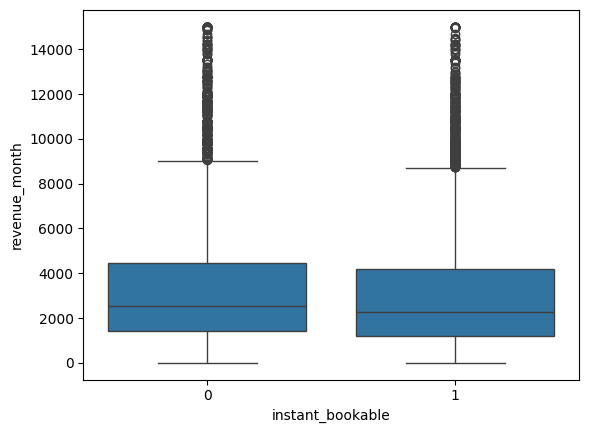

In [22]:
sns.boxplot(data = listings_nyc_final, x = "instant_bookable", y = "revenue_month")

- Recap:

'external_amenities' group with: 'bbq', 'balcony', 'nature_and_views', 'outdoor_space', 'hot_tub_sauna_or_pool'

building_offers' group with: 'elevator', 'gym', 'parking', 'private_entrance', 'self_check_in', 'secure', 'smoking_allowed', 'accessible', 'event_suitable', 'pets_allowed', 'child_friendly'

'internal_amenities' group with: 'air_conditioning', 'bed_linen', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'internet', 'high_end_electronics'

'extras' group with: 'breakfast', 'host_greeting', 'long_term_stays', 'check_in_24h'

Text(0.5, 0.98, 'Amenities graphs')

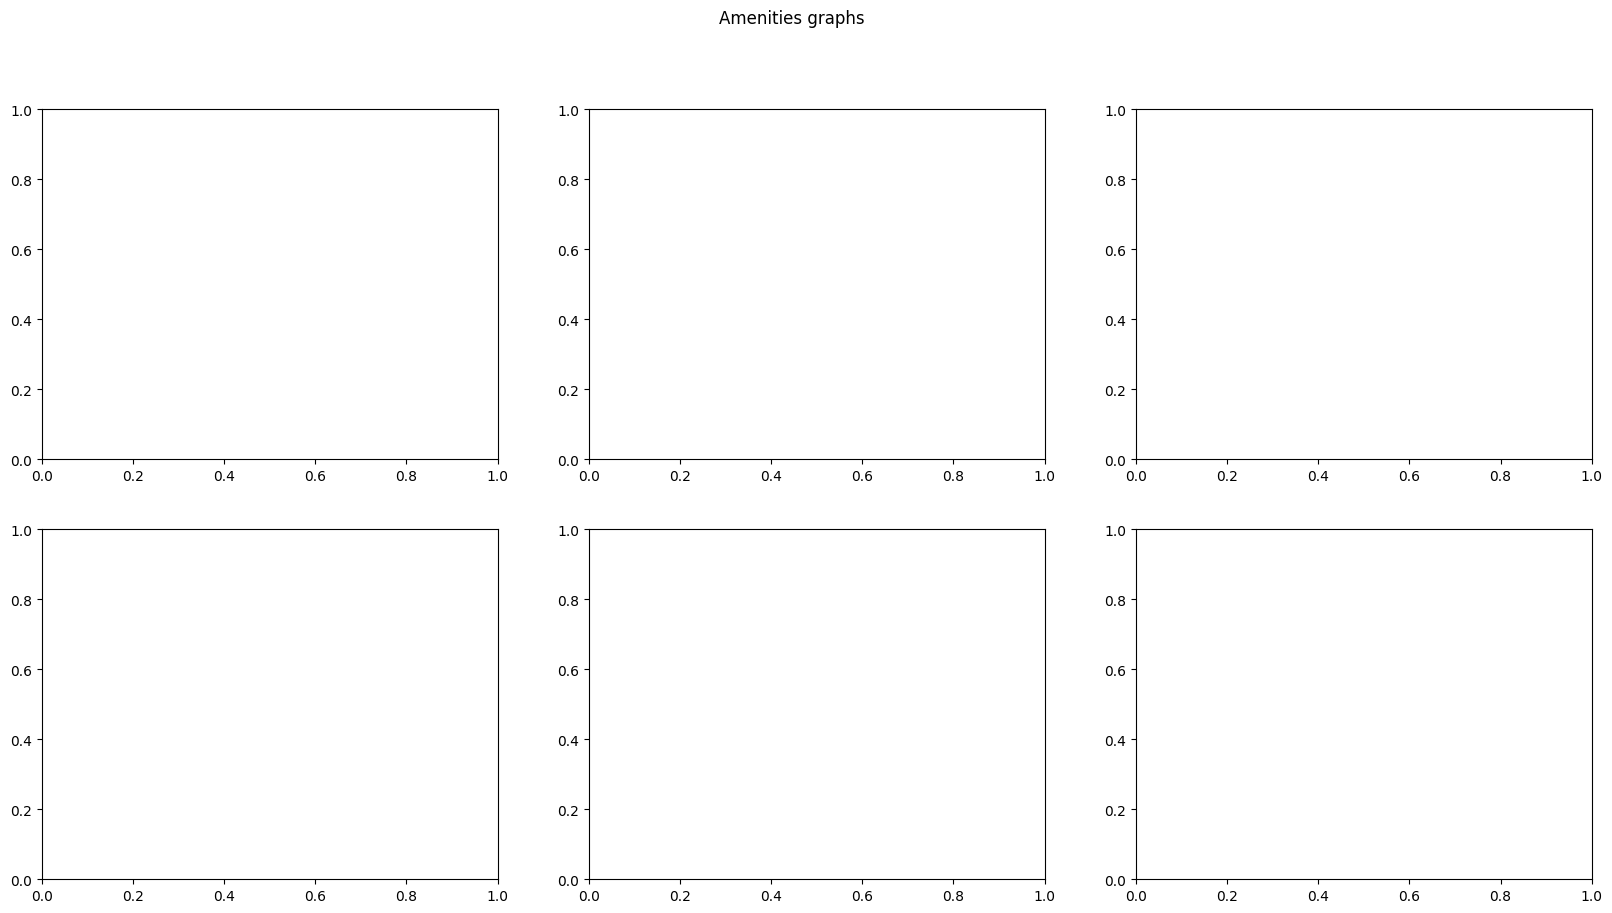

In [23]:
fig, axes = plt.subplots(
    nrows=2, 
    ncols=3,
    figsize=(20,10)
)

fig.suptitle("Amenities graphs")

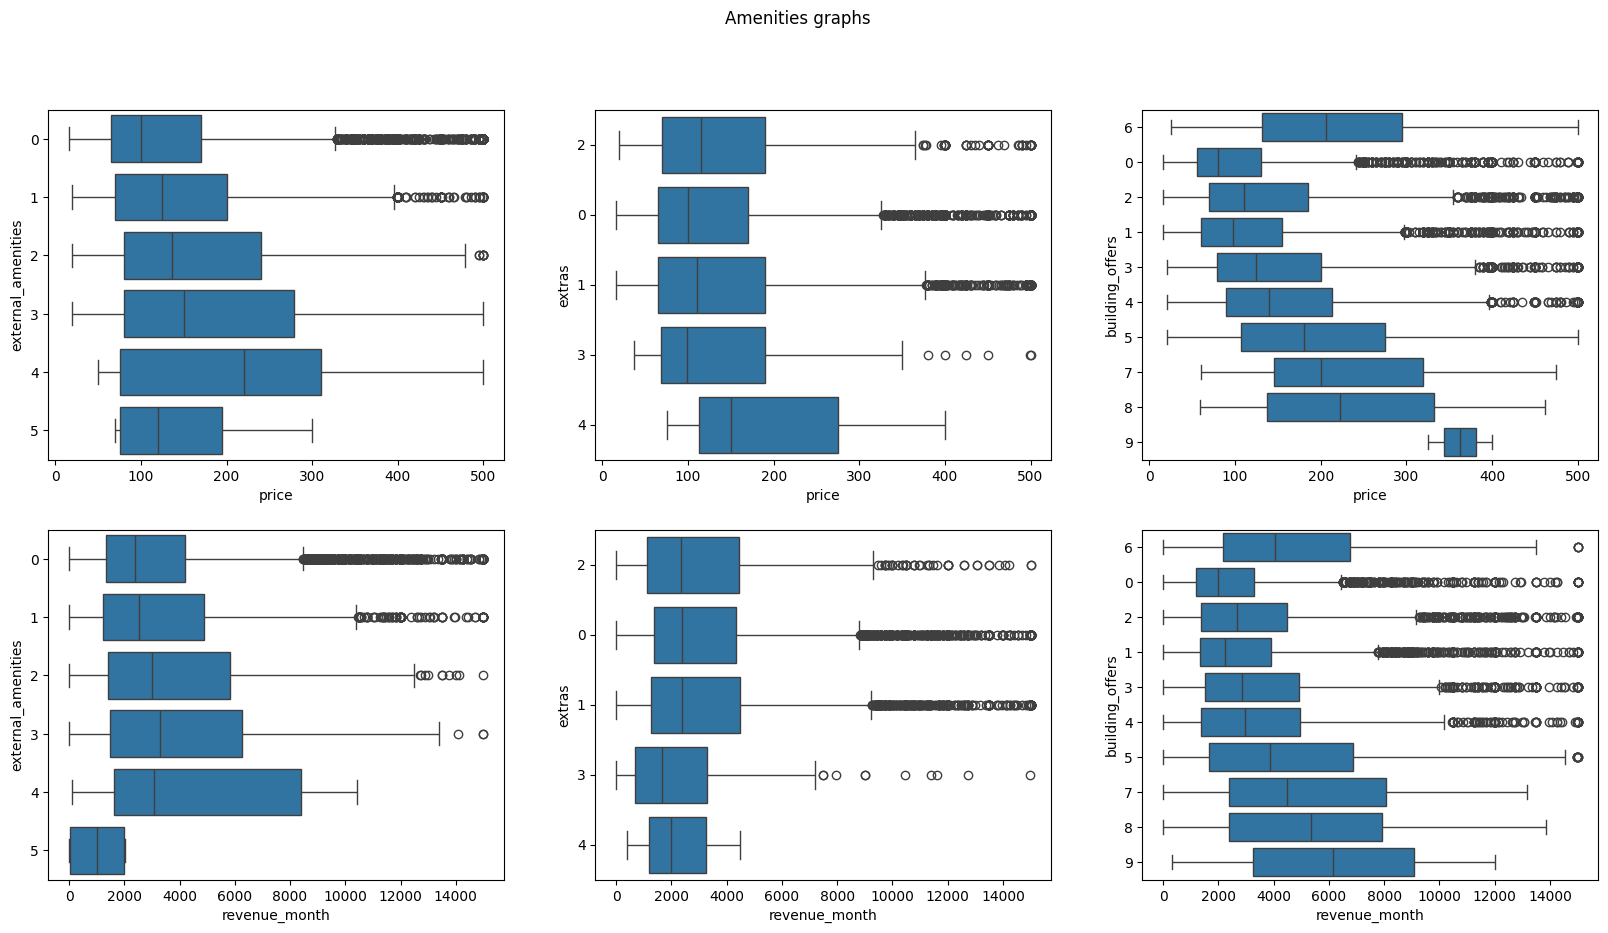

In [24]:
listings_nyc_final['extras'] = listings_nyc_final['extras'].apply(str)
listings_nyc_final['external_amenities'] = listings_nyc_final['external_amenities'].apply(str)
listings_nyc_final['building_offers'] = listings_nyc_final['building_offers'].apply(str)

sns.boxplot(
    data = listings_nyc_final,
    x = "price",
    y = "external_amenities",
    ax = axes[0,0]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "price",
    y = "extras",
    ax = axes[0,1]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "price",
    y = "building_offers",
    ax = axes[0,2]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "revenue_month",
    y = "external_amenities",
    ax = axes[1,0]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "revenue_month",
    y = "extras",
    ax = axes[1, 1]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "revenue_month",
    y = "building_offers",
    ax = axes[1,2]
)


fig

Text(0.5, 0.98, 'Internal amenities graphs')

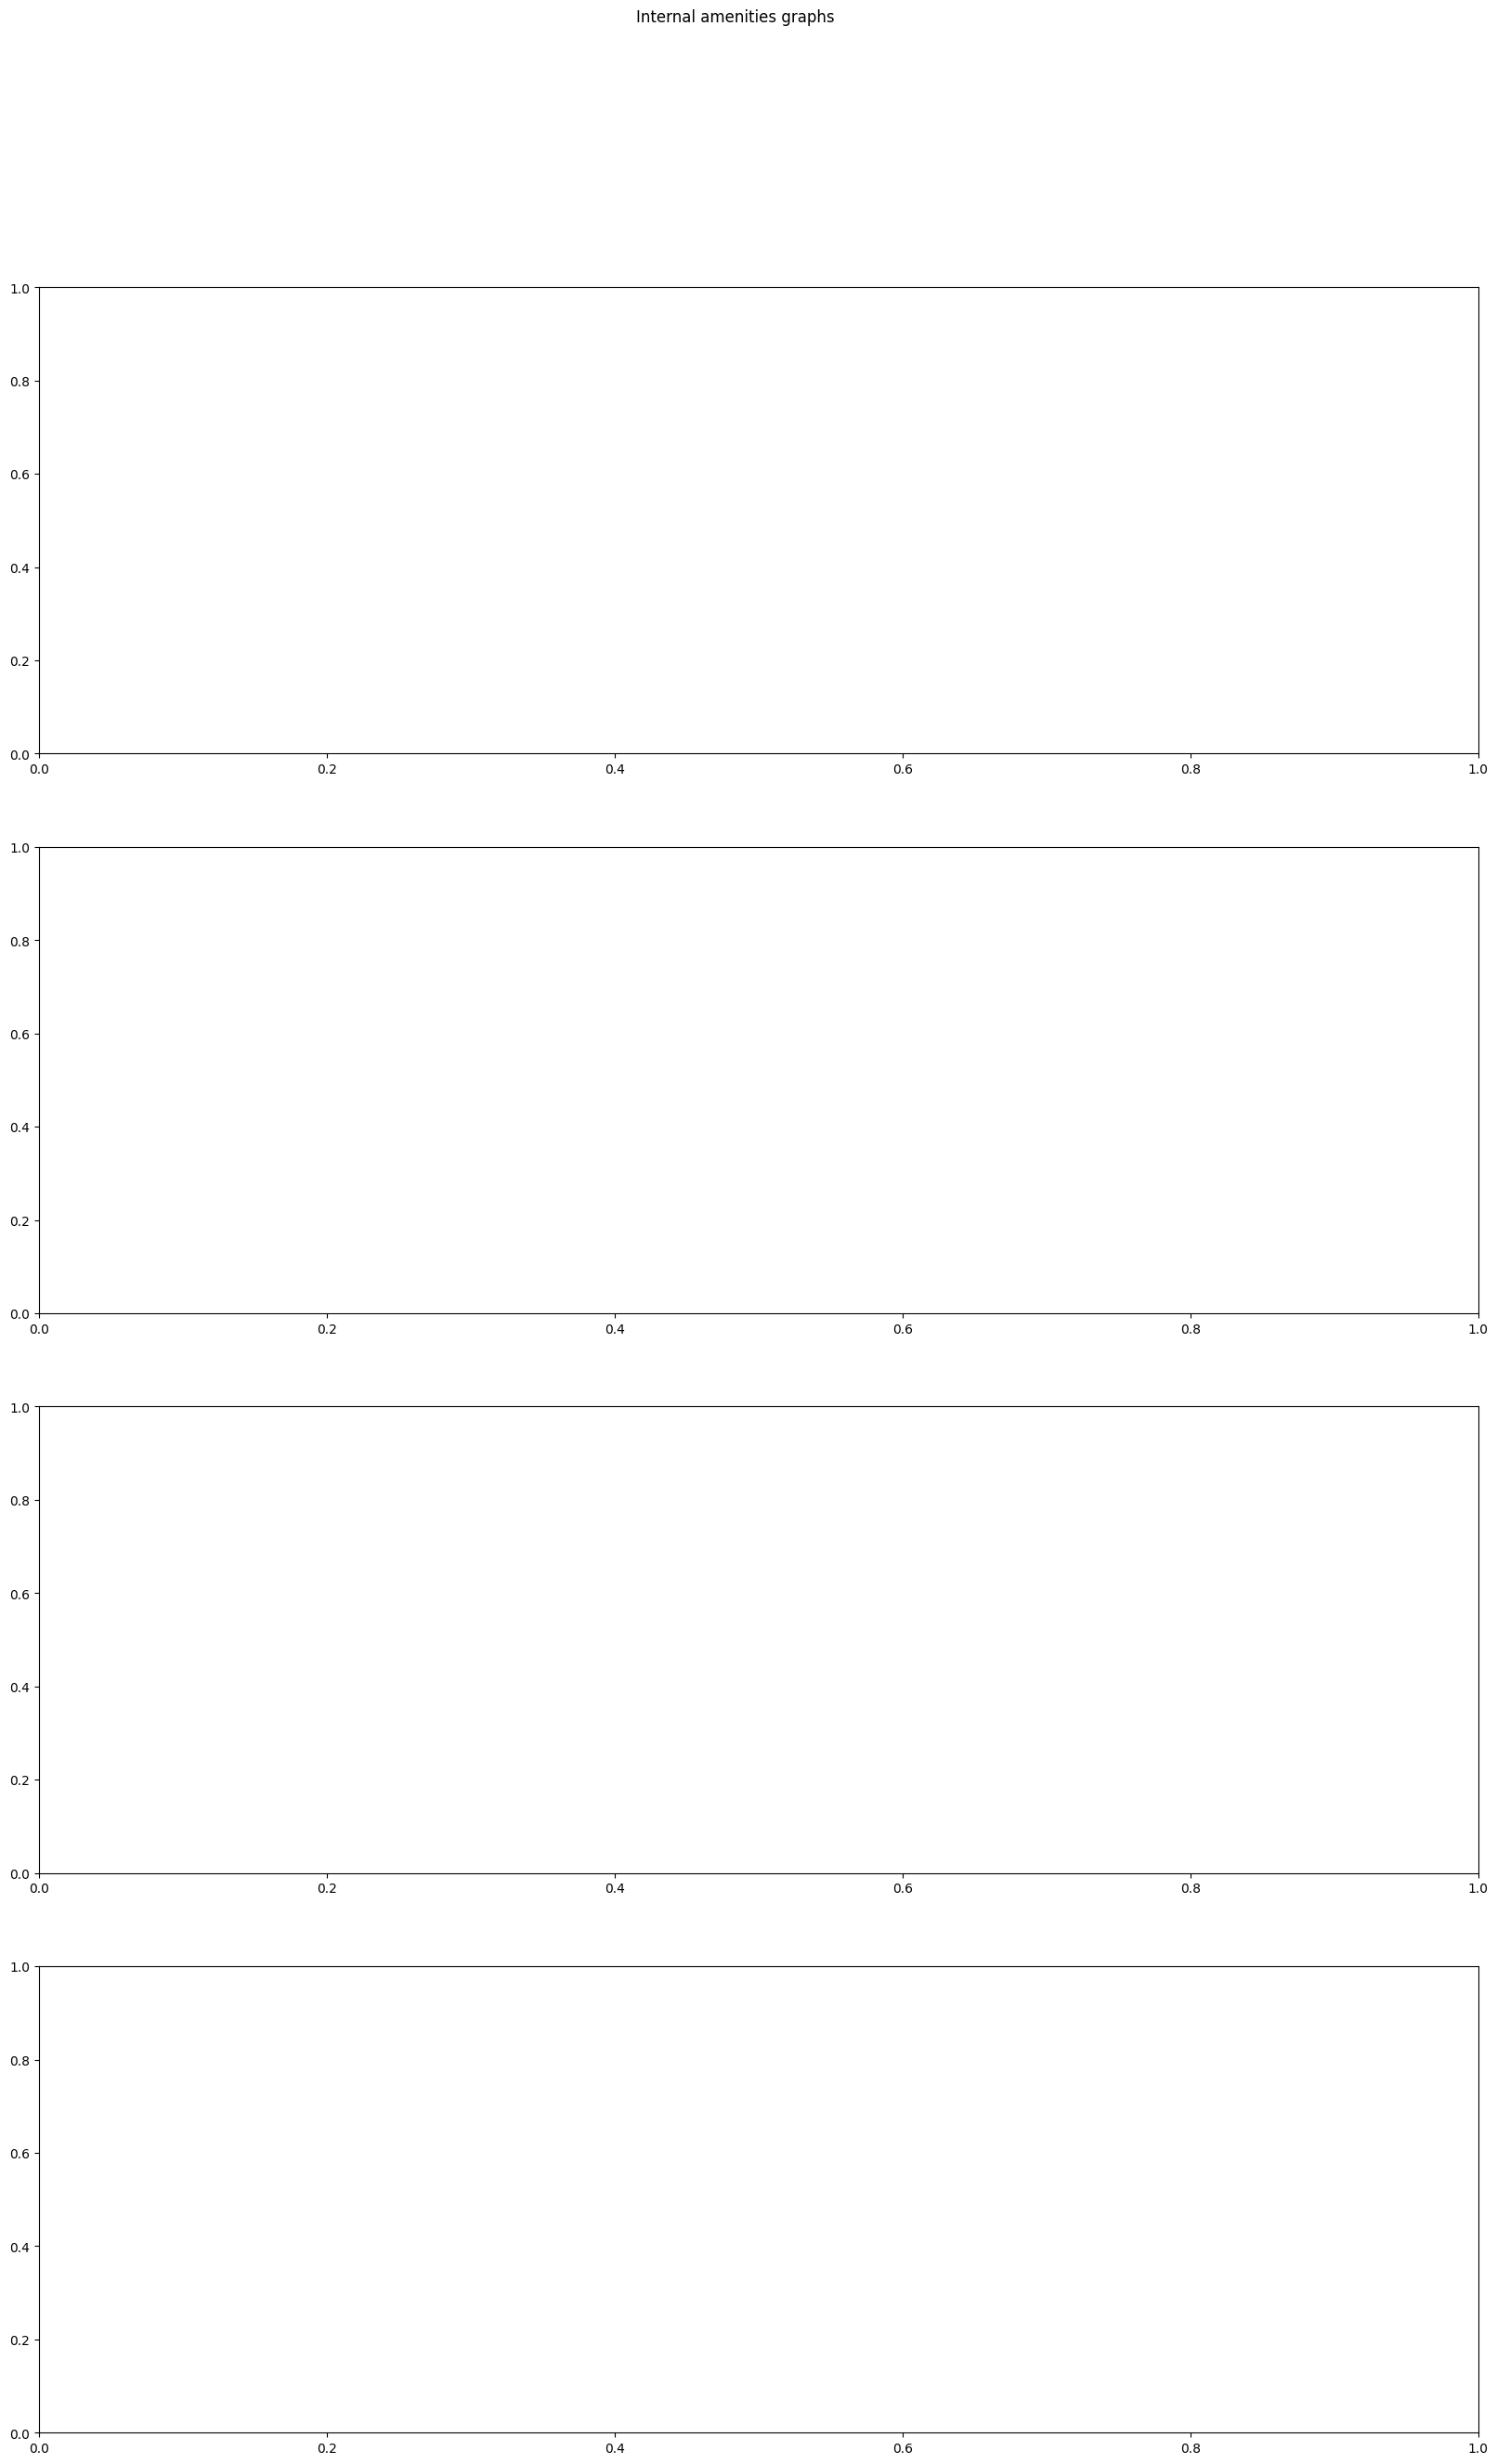

In [25]:
fig2, axes = plt.subplots(
    nrows=4, 
    ncols=1,
    figsize=(20, 30)
)

fig2.suptitle("Internal amenities graphs")

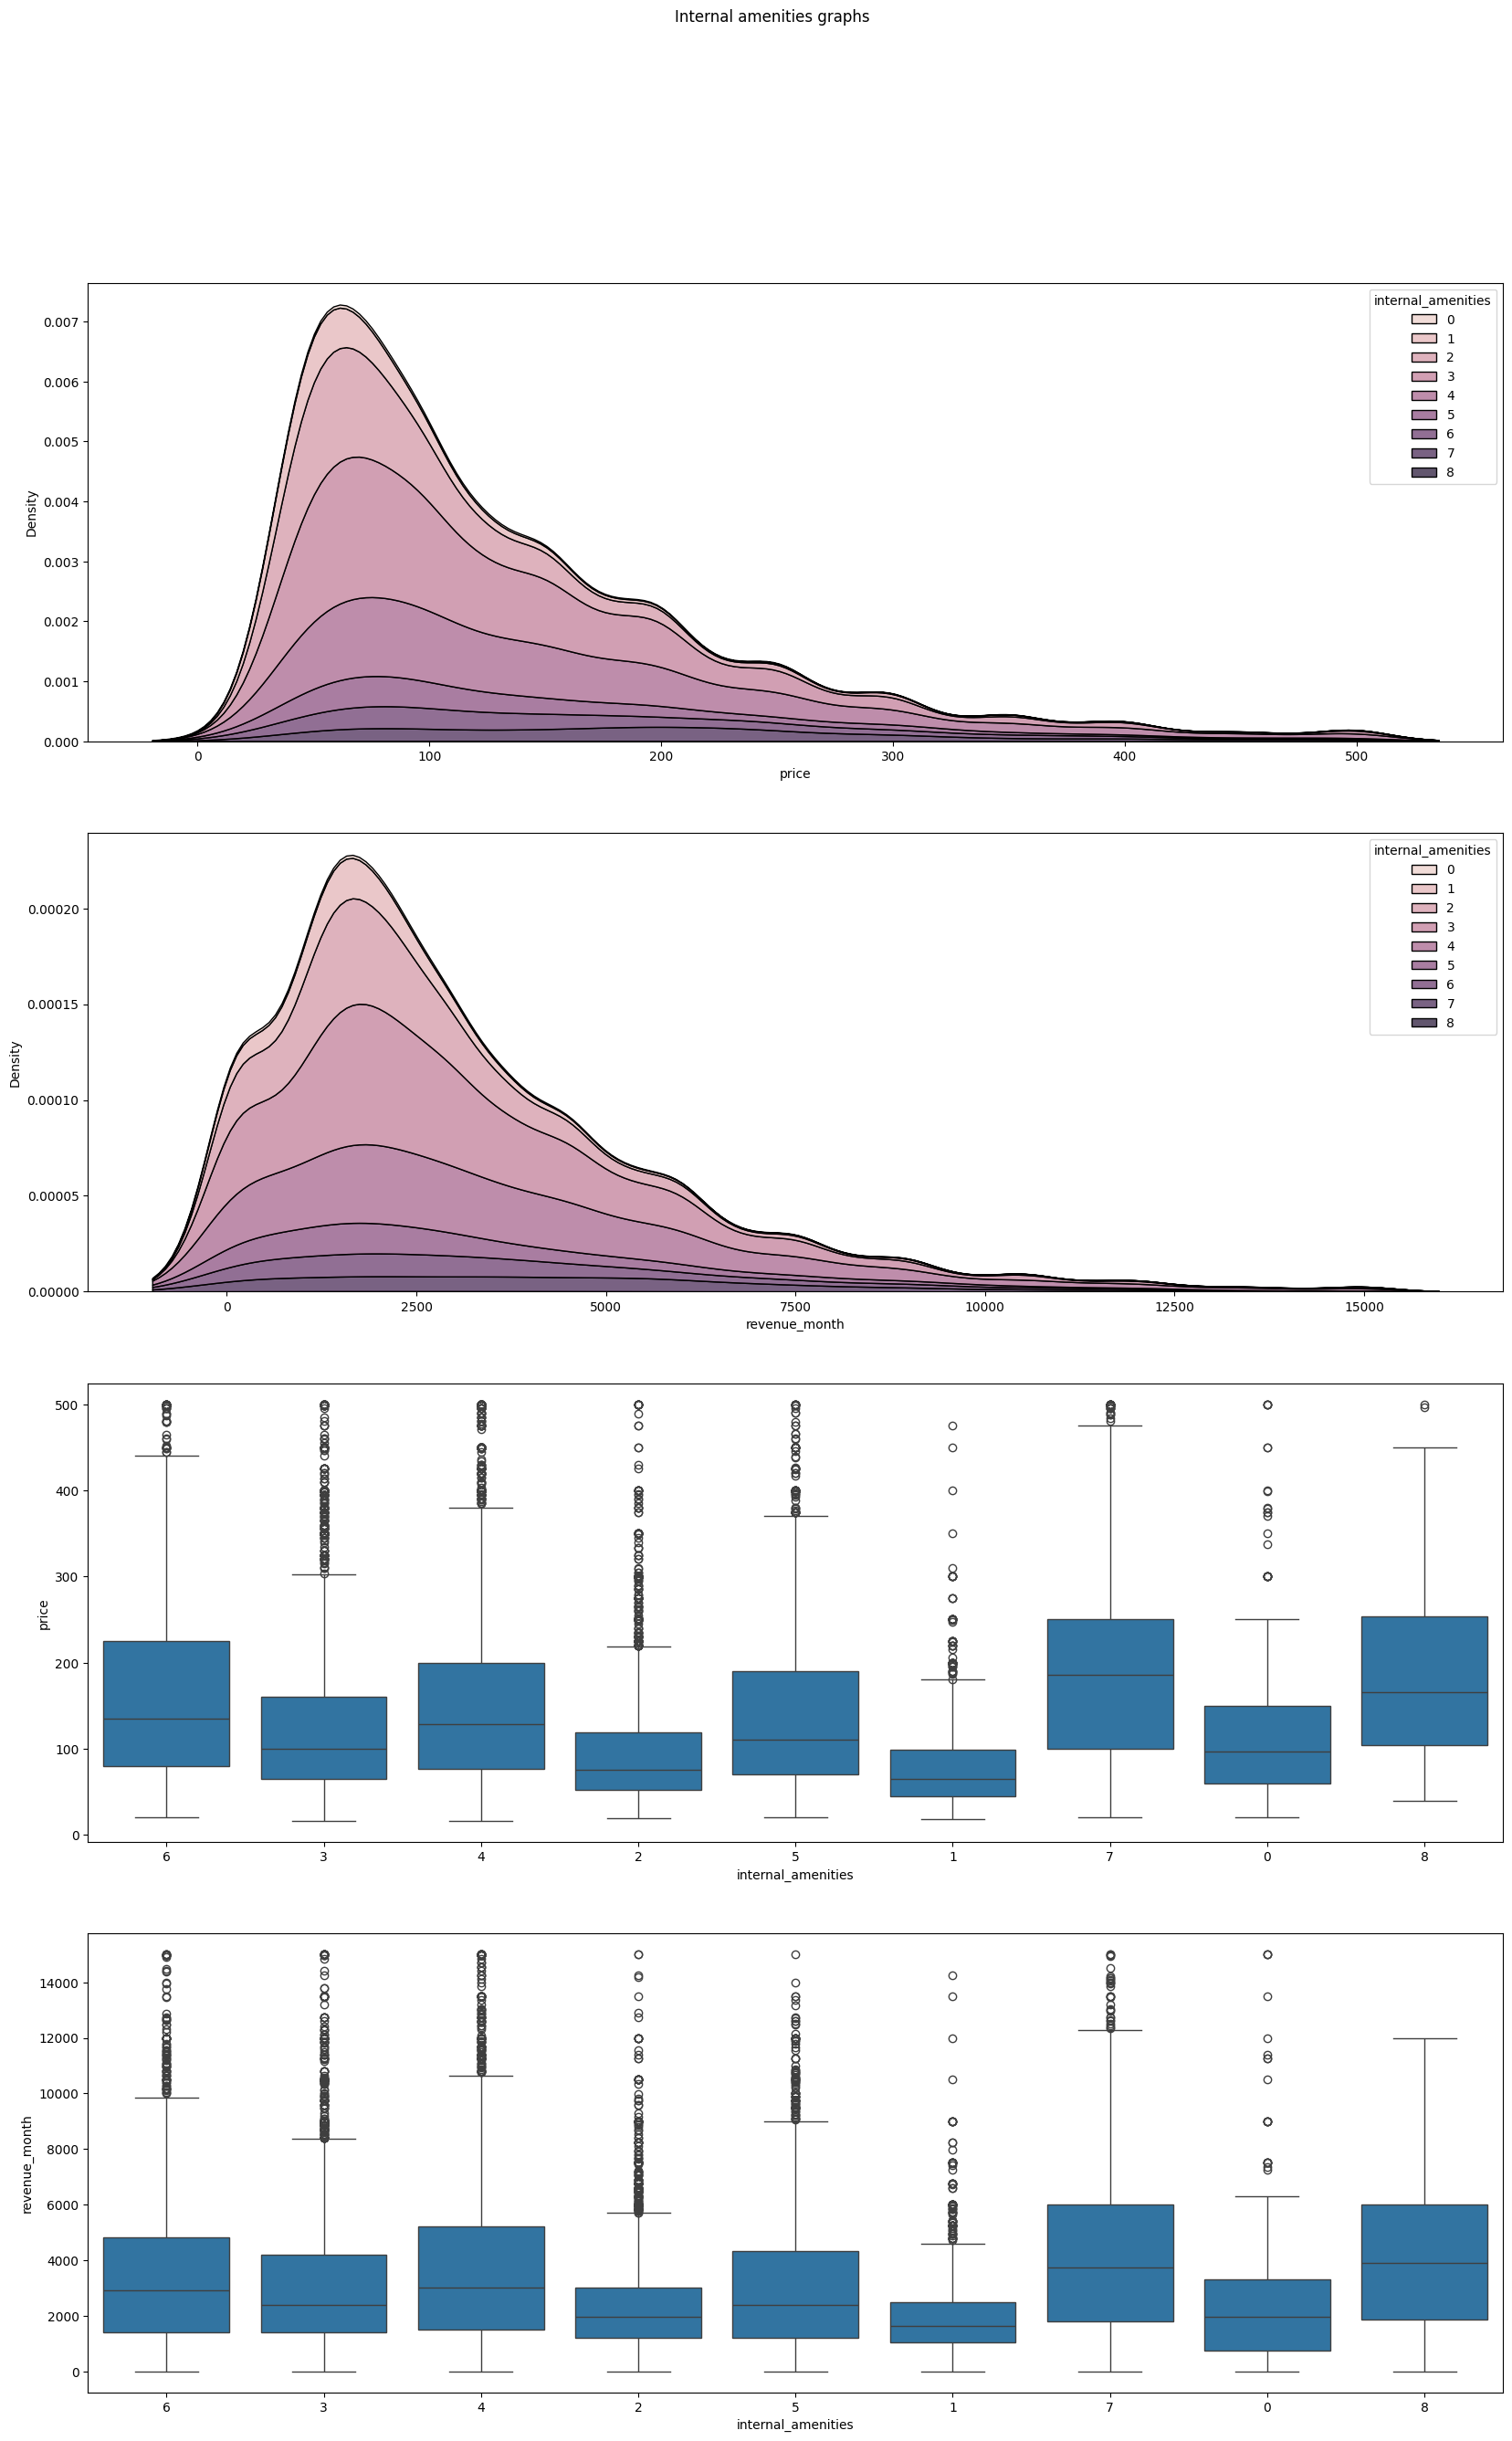

In [26]:
sns.kdeplot(
    data = listings_nyc_final,
    x = "price",
    hue = "internal_amenities",
    multiple = "stack",
    ax = axes[0]
)

sns.kdeplot(
    data = listings_nyc_final,
    x = "revenue_month",
    hue = "internal_amenities",
    multiple = "stack",
    ax = axes[1]
)

listings_nyc_final['internal_amenities'] = listings_nyc_final['internal_amenities'].apply(str)

sns.boxplot(
    data = listings_nyc_final,
    x = "internal_amenities",
    y = "price",
    ax = axes[2]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "internal_amenities",
    y = "revenue_month",
    ax = axes[3]
)

fig2

### Neighborhood



In [27]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[40.86754,-73.92639], 
                         zoom_start=12, 
                         tiles="OpenStreetMap")
folium_hmap

 - It seems that both pricing and monthly revenue peak in the same areas

In [28]:
folium_hmap.add_child(
    HeatMap(
        listings_nyc_final[['latitude','longitude','price']],
        min_opacity = 0.2,
        radius = 8,
        blur = 6
    )
)


In [29]:
folium_hmap.add_child(
    HeatMap(
        listings_nyc_final[['latitude','longitude','revenue_month']],
        min_opacity = 0.2,
        radius = 8,
        blur = 6
    )
)